# Image recognition of clothing using Tensorflow

### Following tutorial below:

https://www.tensorflow.org/tutorials/keras/classification

In [61]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [62]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [64]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [65]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [66]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Fashion_Mnist Dataset:** 

60000 training images, 10000 test images each of 28x28 pixel grid. Labels are integer 0-9.

Data appears to be complete

**Preprocessing Data**

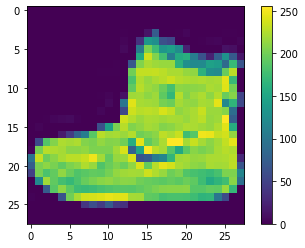

In [67]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [68]:
#Data is scaped from 0-255 (RGB values). Will need to rescale to 0 to 1.

train_images = train_images / 255
test_images = test_images / 255

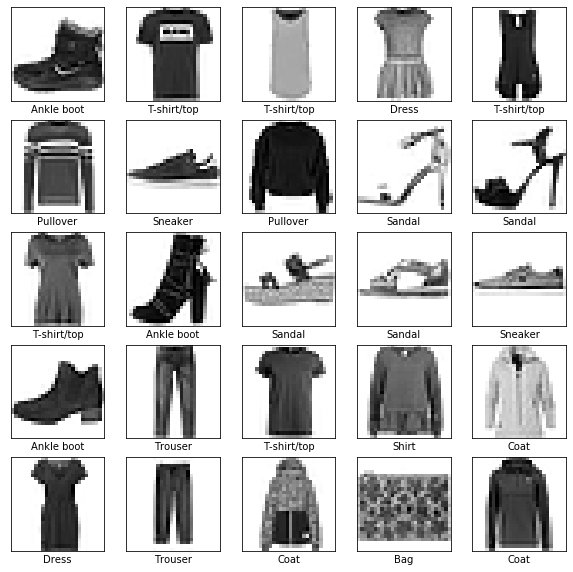

In [69]:
#Pull first 25 images from training dataset and 
#display labels to check for data quality

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**keras.layers.Dense**

output = activation(dot(input, kernel) + bias)
activation is element wise funtions
kernel is weights matrix created by layer
bias is bias vector created by layer

Used to reshape inputs

Rectified linear unit: 

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

ReLU: 

* allows for sensativitly near limits vs prior use of sigmoidal or tanh functions (which drop off data near limits, causing nodes to "die" - vanishing gradient problem).

* linear for half the input domain, non linear for other half. Peicewise or hinge function

**return (max(0.0, x))**

|Input   |Ouput  |
|:-------|:------|
|1.0     |1.0    |
|1000.0  |1000.0 |
|1.0     |0.0    |
|-1.0    |0.0    |
|-1000   |0.0    |

In [70]:
#setup sequential layers for neural net

model = keras.Sequential([                        #in order
    keras.layers.Flatten(input_shape=(28,28)),    #28x828 grid to 784x1 dim
    keras.layers.Dense(128, activation='relu'),   #784x1 to 128x1
                                                  #REctified Linear Unit
                                                  #bias is 1.0 by default
    keras.layers.Dense(10)                        #return a 10x1 array
])

In [71]:
#additional settings for optimizer funtion, loss function, and metric

model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
#feed the model set of training data, 10 iterations through net

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.4975 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3799 - accuracy: 0.8621
Epoch 3/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3380 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3112 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2958 - accuracy: 0.8907
Epoch 6/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2804 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2685 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2572 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2480 - accuracy: 0.9080
Epoc

In [73]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3286 - accuracy: 0.8869

Test accuracy: 0.8869


Test accuracy is higher than training accuracy. Overfitting of model.

**TODO**: Investigate ways to reduce overfitting.

In [74]:
#apply the model as the first layer to the input, 
#then apply a softmax layer to convert to probability

probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])


In [75]:
#use prediction model to predict the label for test images
predictions = probability_model.predict(test_images)

In [76]:
#'confidence' of being in each category
predictions[0]

array([4.6517580e-06, 1.5781555e-11, 3.6391287e-07, 1.3879303e-08,
       5.5517007e-06, 8.5478313e-03, 1.2613125e-05, 1.0145614e-02,
       2.3328735e-06, 9.8128110e-01], dtype=float32)

In [77]:
np.argmax(predictions[0])

9

In [78]:
test_labels[0]

9

In [79]:
#setup a graph to look at full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [80]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

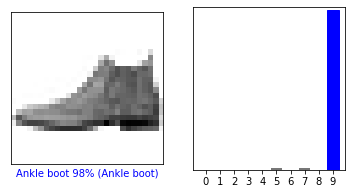

In [81]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

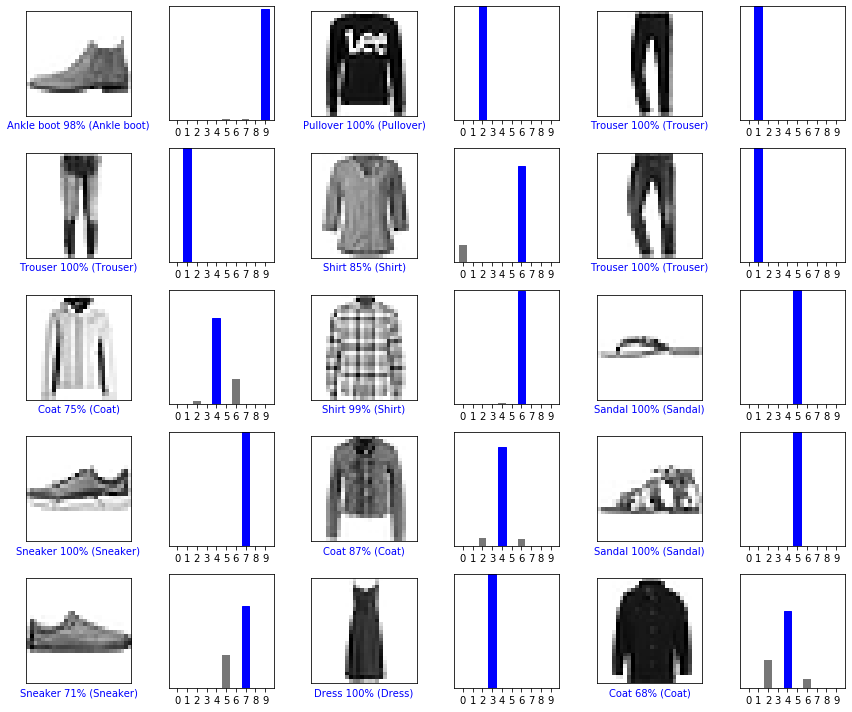

In [82]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()